**Perform hierarchical clustering on the Play data and and the data generated with the help of two equations of concentric circles, adding some random noise, as shown the class. Apply various distance measures, including single, multiple, and average linkages.**

**Perform k-Means clustering on the Boston housing data and arrive at an optimal number of clusters via the elbow method.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_excel('play.xlsx')

In [3]:
dataset.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [4]:
print(dataset['Outlook'].unique())
dataset['Windy'].unique()
print([[dataset['Windy'].unique()]])

['overcast' 'sunny' 'rain']
[[array(['strong', 'weak'], dtype=object)]]


In [5]:
dataset_numeric=dataset[['Temperature','Humidity']]

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

encoder = OrdinalEncoder()
# Transforming data
windy_enc = encoder.fit_transform(dataset['Windy'].values.reshape(-1,1))
Windy=pd.DataFrame(windy_enc,columns=['Windy'])

In [7]:
Y=dataset.iloc[:,-1].values
Y

array(['play', 'play', 'play', 'play', 'play', 'dont_play', 'dont_play',
       'dont_play', 'play', 'dont_play', 'dont_play', 'play', 'play',
       'play'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [9]:
decision=pd.DataFrame(Y,columns=['Decision'])

In [10]:
Outlook_enc=pd.get_dummies(dataset['Outlook'])
Outlook_enc

,overcast,rain,sunny
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [11]:
X=pd.concat([dataset_numeric,Outlook_enc,Windy,decision],axis=1)
X

,Temperature,Humidity,overcast,rain,sunny,Windy,Decision
0,72,90,1,0,0,0.0,1
1,83,78,1,0,0,1.0,1
2,64,65,1,0,0,0.0,1
3,81,75,1,0,0,1.0,1
4,75,70,0,0,1,0.0,1
5,80,90,0,0,1,0.0,0
6,85,85,0,0,1,1.0,0
7,72,95,0,0,1,1.0,0
8,69,70,0,0,1,1.0,1
9,71,80,0,1,0,0.0,0


In [12]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled_X=sc.fit_transform(X)

In [13]:
from sklearn.preprocessing import normalize
data_scaled = normalize(scaled_X)

In [14]:
data_scaled=pd.DataFrame(sc.fit_transform(X),columns=['Temperature','Humidity','overcast','rain','sunny','Windy','Decision'])

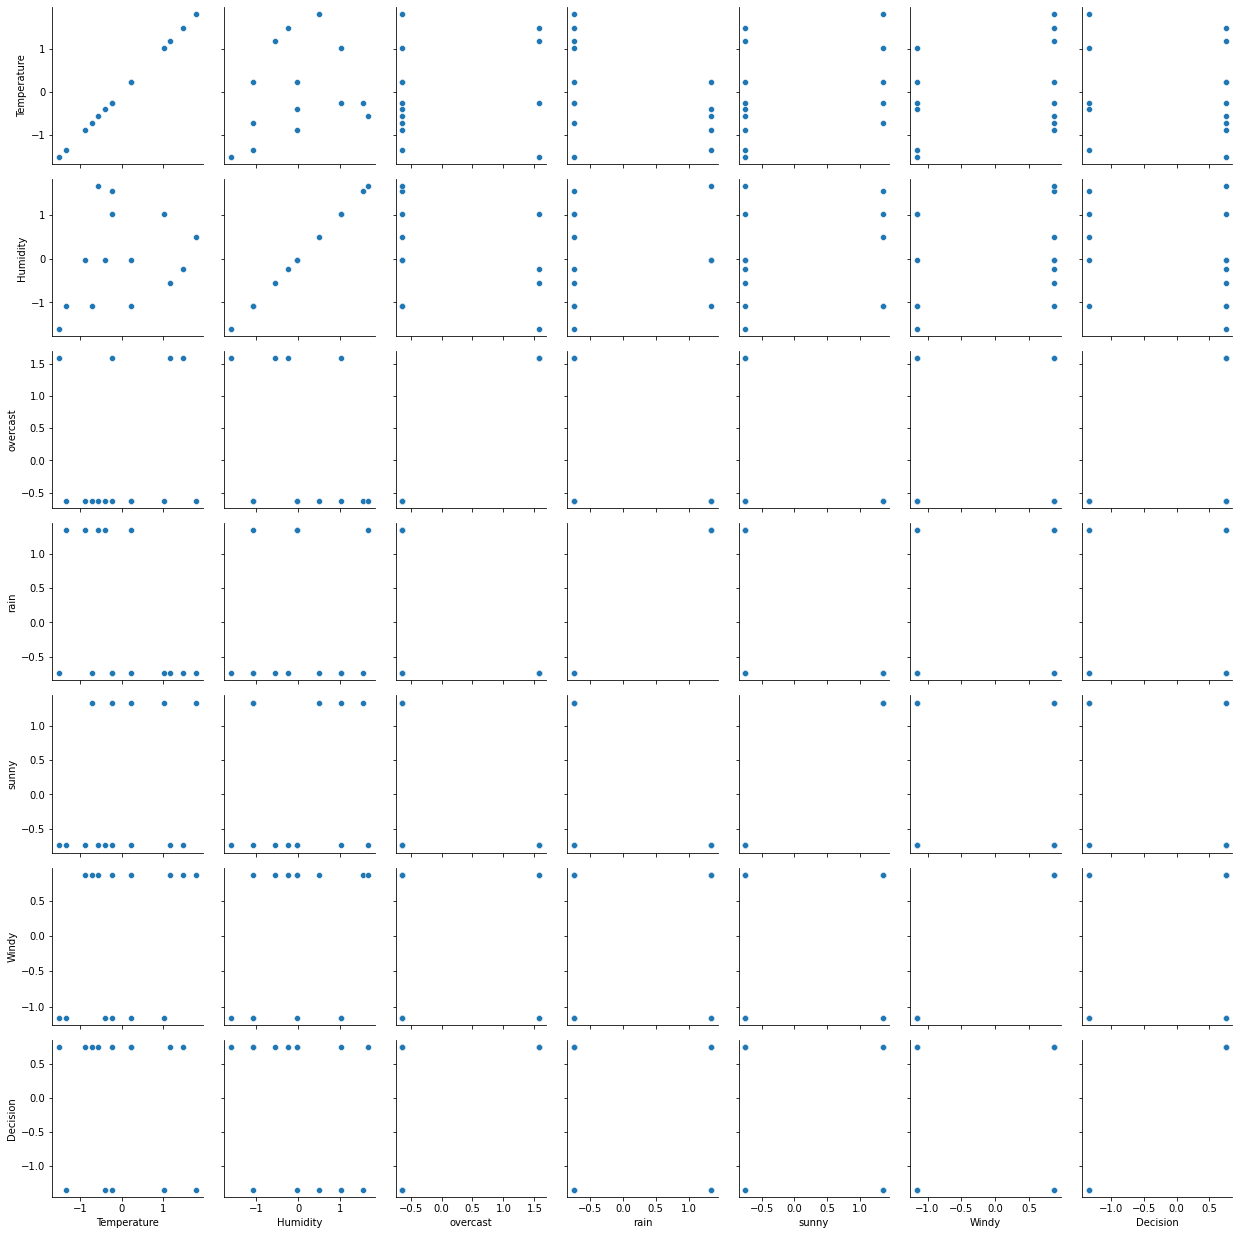

In [15]:
from sklearn.cluster import KMeans
import seaborn as sns
g = sns.PairGrid(data_scaled)
g.map(sns.scatterplot)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import average
from sklearn.cluster import AgglomerativeClustering

In [17]:
avg = average(data_scaled)

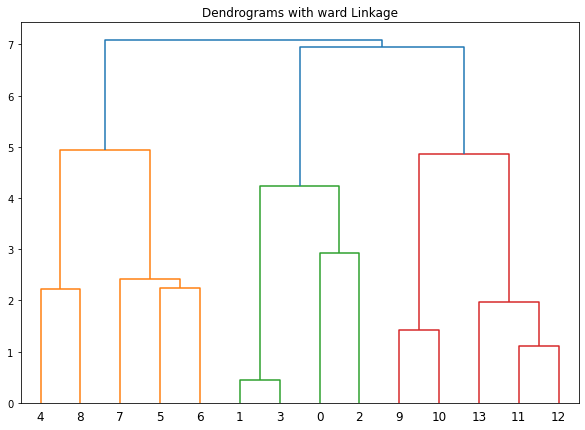

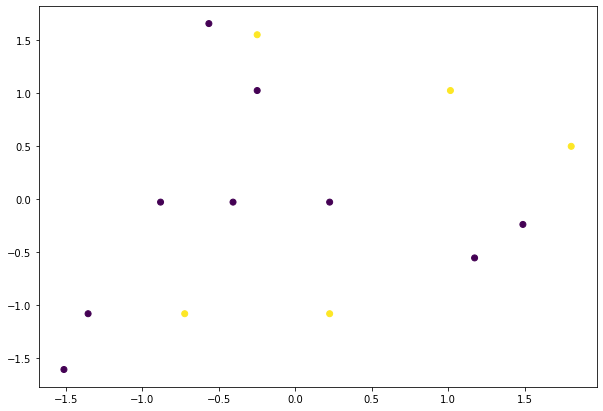

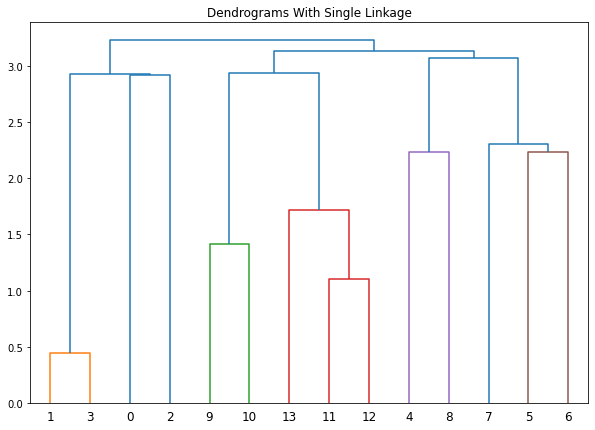

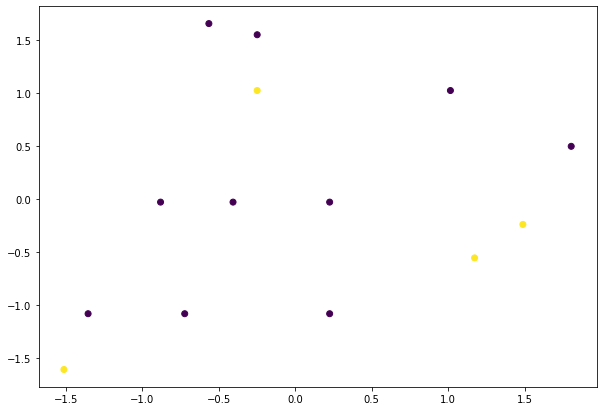

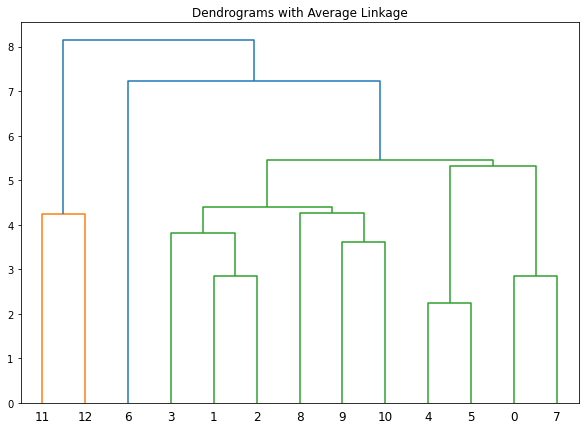

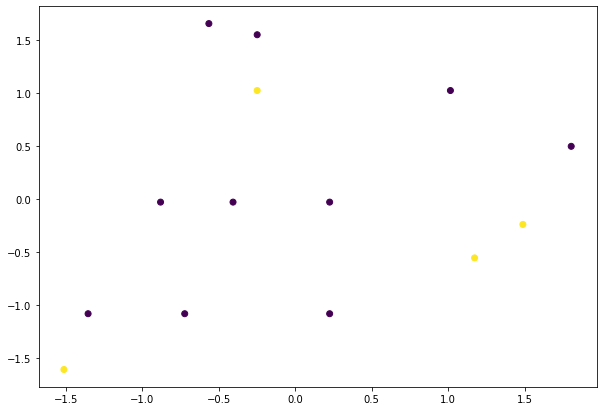

In [18]:
#Plotting the dendrogram using ward linkage and the euclidean metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with ward Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='ward',metric='euclidean'))

#Fitting and predicting the data using Agglomerative Clustering with 2 clusters and the euclidean metric and ward linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

#Plotting the dendrogram using single linkage and the euclidean metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Single Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='single',metric='euclidean'))

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

#Plotting the dendrogram using average linkage and the euclidean metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with Average Linkage")  
dend = hc.dendrogram(hc.linkage(avg,metric='euclidean'))

#Fitting and predicting the data using Agglomerative Clustering with 2 clusters and the euclidean metric and average linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(data_scaled)

#Plotting the results of the clustering
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

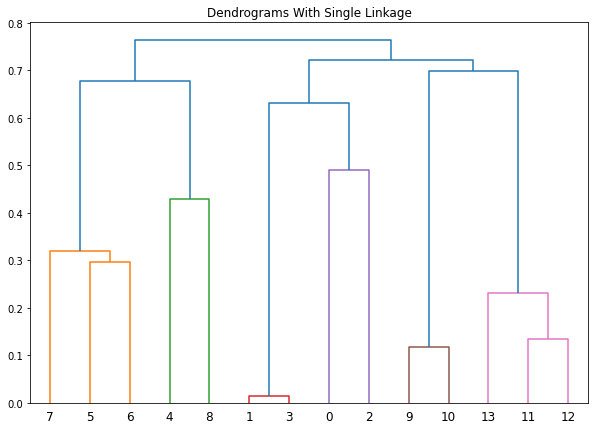

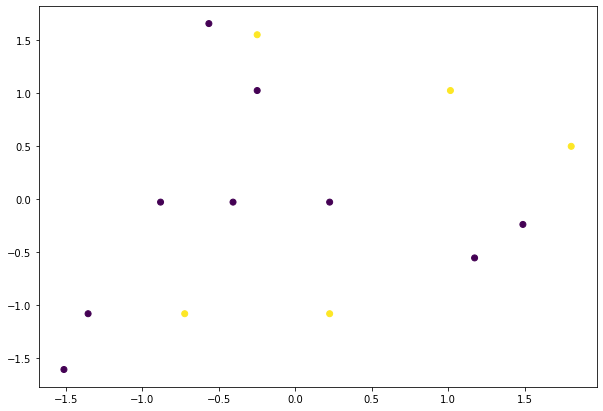

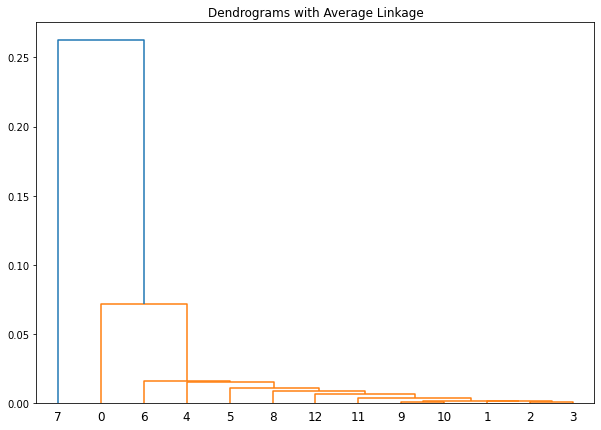

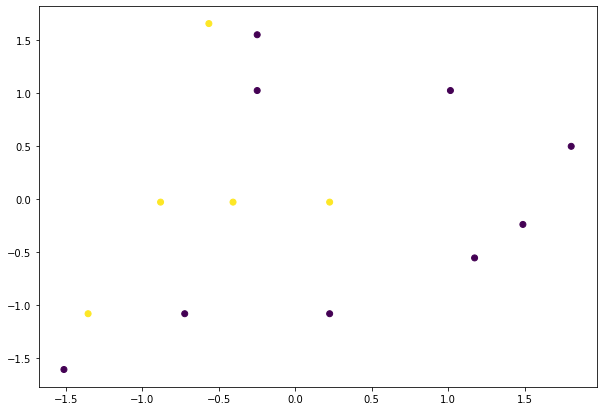

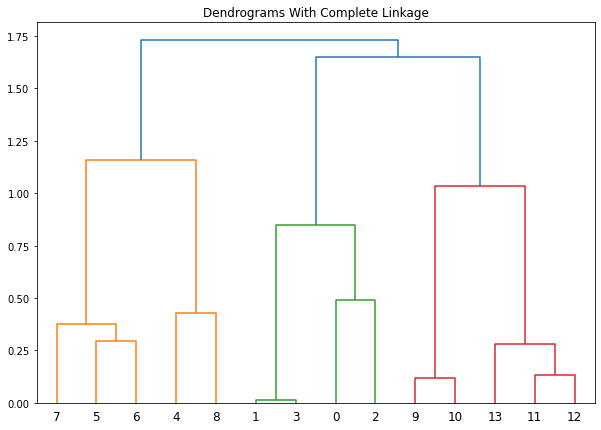

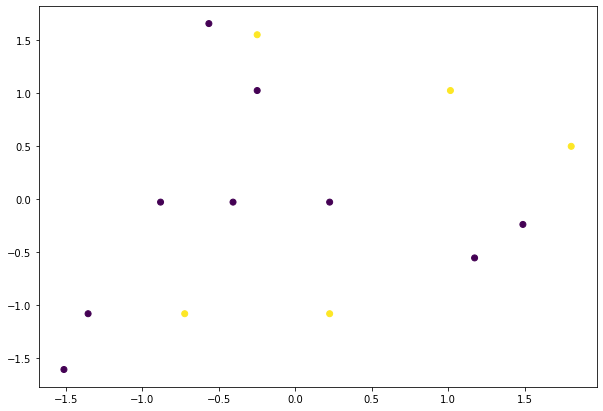

In [19]:
#Plotting the dendrogram using ward linkage and the cosine metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Single Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='single',metric='cosine'))

#Fitting and predicting the data using Agglomerative Clustering with 2 clusters and the cosine metric and ward linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')  
cluster.fit_predict(data_scaled)

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

#Plotting the dendrogram using single linkage and the cosine metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with Average Linkage")  
dend = hc.dendrogram(hc.linkage(avg,metric='cosine'))

cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

#Plotting the dendrogram using average linkage and the cosine metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Complete Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='complete',metric='cosine'))

#Fitting and predicting the data using Agglomerative Clustering with 2 clusters and the cosine metric and average linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
cluster.fit_predict(data_scaled)

#Plotting the results of the clustering
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

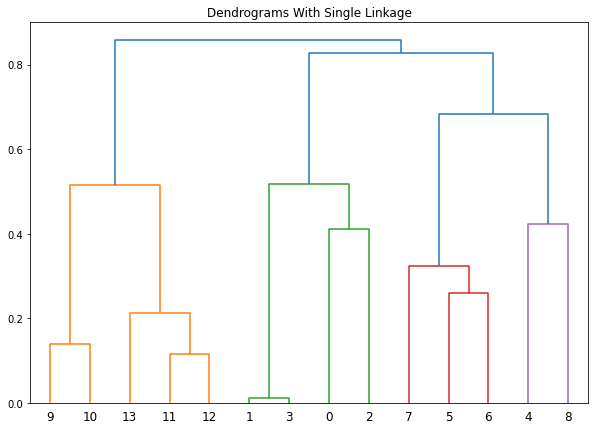

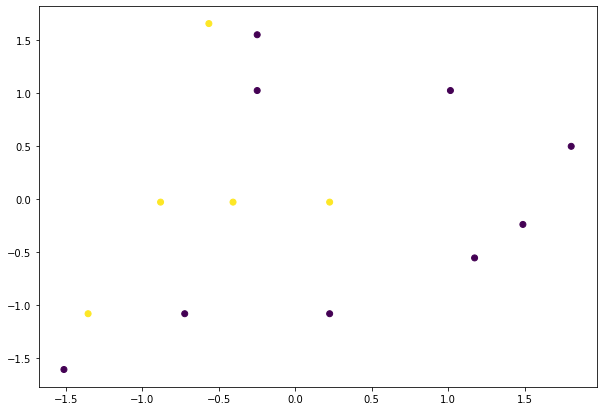

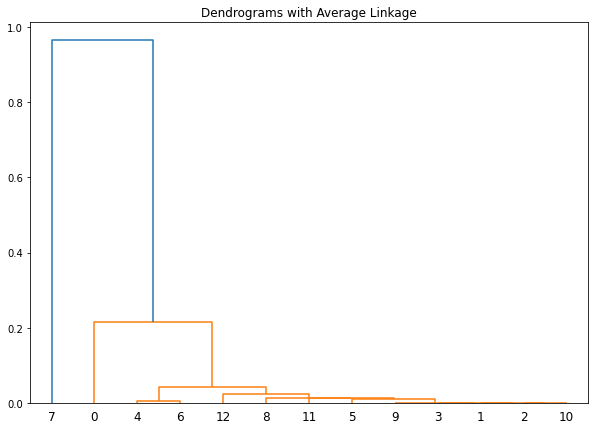

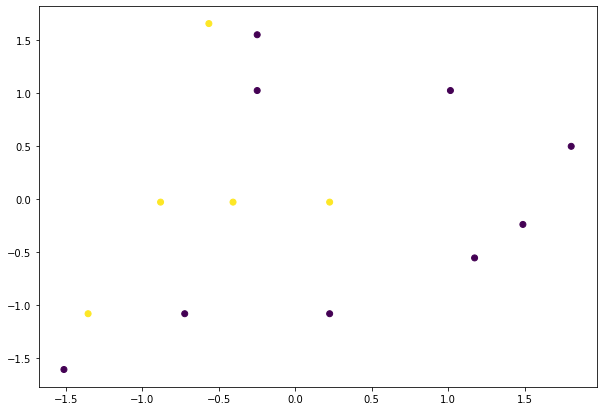

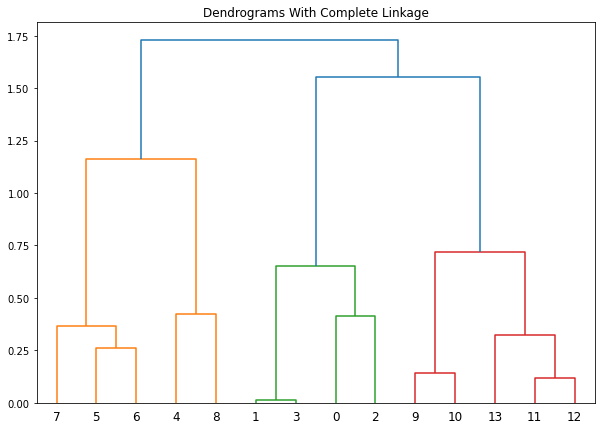

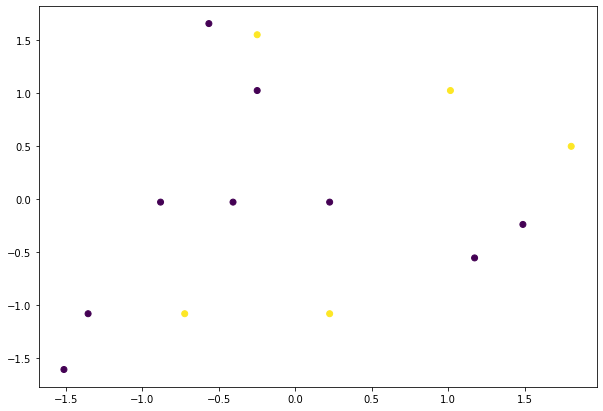

In [20]:
#Plotting the dendrogram using single linkage and the single metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Single Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='single',metric='correlation'))

#Fitting and predicting the data using Agglomerative Clustering with 2 clusters and the single metric and ward linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='single')  
cluster.fit_predict(data_scaled)

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

#Plotting the dendrogram using single linkage and the correlation metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with Average Linkage")  
dend = hc.dendrogram(hc.linkage(avg,metric='correlation'))


cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='average')  
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_) 

#Plotting the dendrogram using complete linkage and the correlation metric
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms With Complete Linkage")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='complete',metric='correlation'))

#Fitting and predicting the data using Agglomerative Clustering with 2 clusters and the correlation metric and complete linkage
cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='complete')  
cluster.fit_predict(data_scaled)

#Plotting the results of the clustering
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Temperature'], data_scaled['Humidity'], c=cluster.labels_)

In [21]:
import random
import numpy as np
r = [5]
n = [50]
for r, n in zip(r, n):
  t = np.linspace(0, 2*np.pi, n, endpoint=False)
  x1 = r * np.cos(t)
  y1 = r * np.sin(t)
  data1 = np.c_[x1, y1]
noise = 0.008*np.asarray(random.sample(range(0,n),n))
y1 = y1 + noise
r = [10]
n = [110]
for r, n in zip(r, n):
  t = np.linspace(0, 2*np.pi, n, endpoint=False)
  x2 = r * np.cos(t)
  y2 = r * np.sin(t)
  data2 = np.c_[x2, y2]
noise = 0.008*np.asarray(random.sample(range(0,n),n))
y2 = y2+ noise

x = np.concatenate((x1, x2), axis=None)        
y = np.concatenate((y1, y2), axis=None)        
        
data = list(zip(x, y))

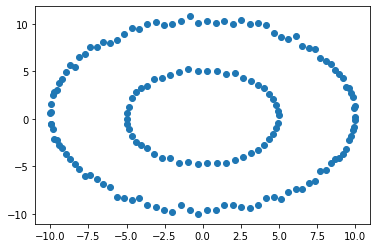

In [22]:
plt.scatter(x,y)
plt.show()

**PLOTTING DENDOGRAM AND CONCENTRIC CIRLCES USING WARD LINKAGE**

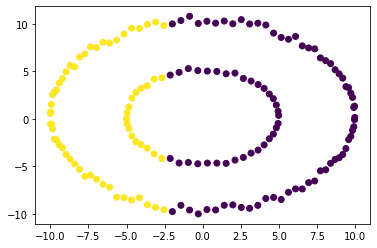

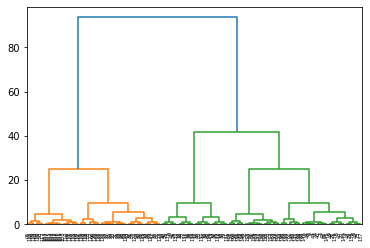

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

**PLOTTING DENDOGRAM AND CONCENTRIC CIRLCES USING SINGLE LINKAGE**

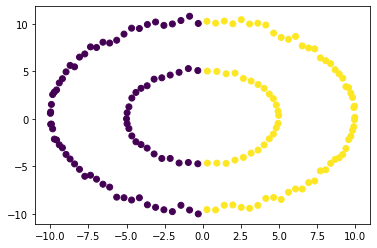

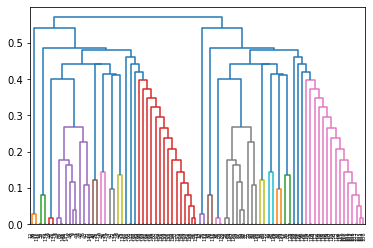

In [24]:
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()

**PLOTTING DENDOGRAM AND CONCENTRIC CIRLCES USING AVERAGE LINKAGE**

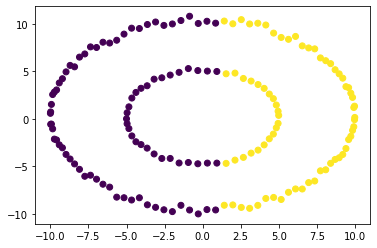

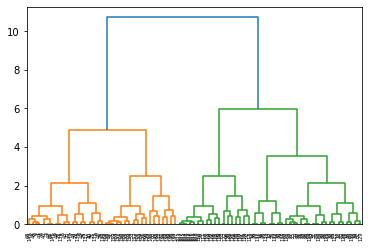

In [25]:
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

**PLOTTING DENDOGRAM AND CONCENTRIC CIRLCES USING COMPLETE LINKAGE**

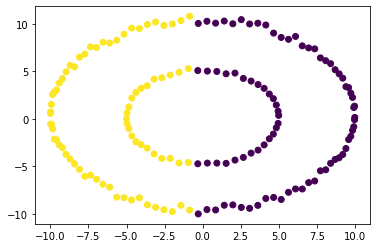

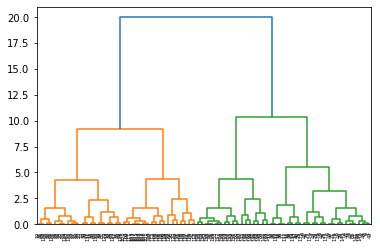

In [26]:
x=pd.DataFrame(x)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
X=cluster.fit_predict(x)
plt.scatter(x,y,c=X)
plt.show()
linkage_data = linkage(x, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()

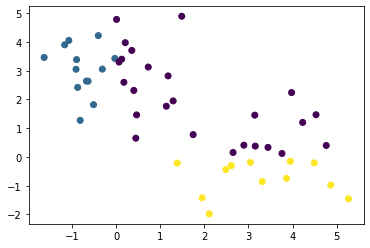

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Generating sample data
np.random.seed(0)
X = np.random.standard_normal((50, 2))
X[:25, 0] += 3
X[25:, 1] += 3

# Divisive clustering
cluster_assignment = []
for i in range(X.shape[0]):
    if X[i, 0] > 0 and X[i, 1] > 0:
        cluster_assignment.append(0)
    elif X[i, 0] < 0 and X[i, 1] > 0:
        cluster_assignment.append(1)
    elif X[i, 0] < 0 and X[i, 1] < 0:
        cluster_assignment.append(2)
    else:
        cluster_assignment.append(3)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignment)
plt.show()


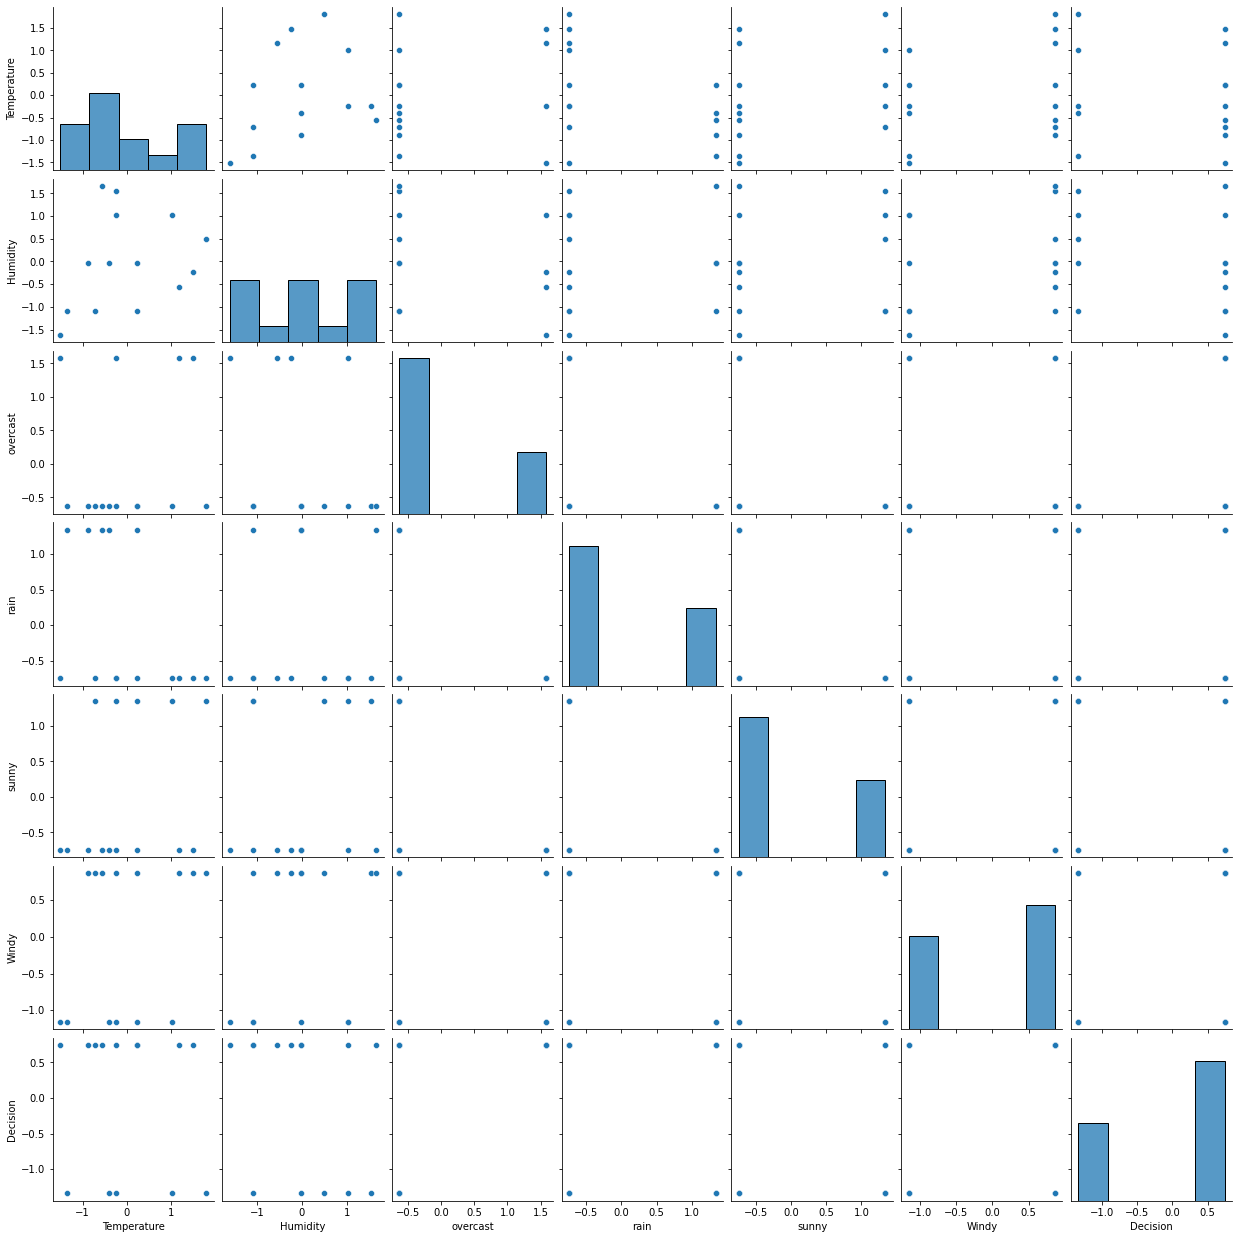

In [28]:
sns.pairplot(data_scaled)


In [29]:
x=data_scaled.iloc[:,:-1]
print(x)

    Temperature  Humidity  overcast      rain     sunny     Windy
0     -0.248148  1.024440  1.581139 -0.745356 -0.745356 -1.154701
1      1.488890 -0.241045  1.581139 -0.745356 -0.745356  0.866025
2     -1.511449 -1.611987  1.581139 -0.745356 -0.745356 -1.154701
3      1.173065 -0.557416  1.581139 -0.745356 -0.745356  0.866025
4      0.225589 -1.084702 -0.632456 -0.745356  1.341641 -1.154701
5      1.015152  1.024440 -0.632456 -0.745356  1.341641 -1.154701
6      1.804715  0.497155 -0.632456 -0.745356  1.341641  0.866025
7     -0.248148  1.551726 -0.632456 -0.745356  1.341641  0.866025
8     -0.721886 -1.084702 -0.632456 -0.745356  1.341641  0.866025
9     -0.406061 -0.030131 -0.632456  1.341641 -0.745356 -1.154701
10    -1.353537 -1.084702 -0.632456  1.341641 -0.745356 -1.154701
11     0.225589 -0.030131 -0.632456  1.341641 -0.745356  0.866025
12    -0.879799 -0.030131 -0.632456  1.341641 -0.745356  0.866025
13    -0.563974  1.657183 -0.632456  1.341641 -0.745356  0.866025


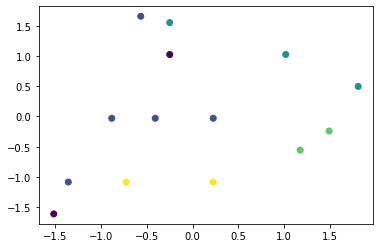

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

plt.scatter(x['Temperature'], x['Humidity'], c=kmeans.labels_)
plt.show()

**K-Means Clustering On Boston Housing Dataset**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
dataset_housing = pd.read_excel('boston housing.xls')
dataset_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [33]:
df=dataset_housing.isnull().count()
df

CRIM     506
ZN       506
INDUS    506
CHAS     506
NOX      506
RM       506
AGE      506
DIS      506
RAD      506
TAX      506
PT       506
B        506
LSTAT    506
MV       506
dtype: int64

In [34]:
X = dataset_housing.iloc[:, [12, 13]].values

In [35]:
X

array([[ 4.98000002, 24.        ],
       [ 9.14000034, 21.60000038],
       [ 4.03000021, 34.70000076],
       ...,
       [ 5.63999987, 23.89999962],
       [ 6.48000002, 22.        ],
       [ 7.88000011, 11.89999962]])

In [36]:
#Fitting the KMeans model into data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
pred_y = pred_y.astype(int)

In [37]:
print(pred_y)

[0 0 2 2 2 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0
 0 0 2 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 2 0 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 2 2 2 2 2 2 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 2 0 0 2 2 2
 0 2 2 2 0 2 0 0 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 

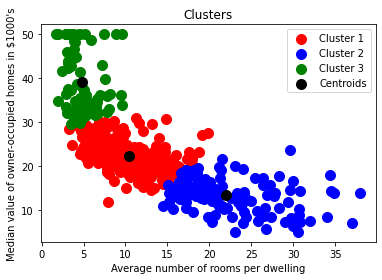

In [38]:
#Plotting Clusters
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#Plotting Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.legend()
plt.show()

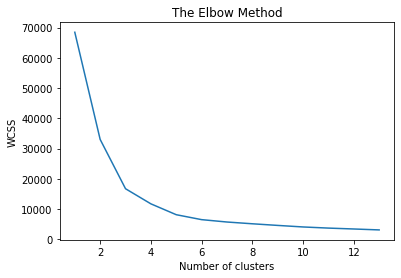

In [39]:
#Elbow method is used to determine the optimal number of clusters by finding the "elbow" in the plot of WCSS against the number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 14), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

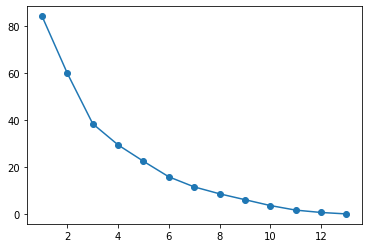

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# Calculating the sum of squared distances for different numbers of clusters
sse = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 14), sse)
plt.scatter(range(1, 14), sse)
plt.show()